## Grover's Algorithm

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
n = 2
grover_circuit = QuantumCircuit(n)

In [3]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

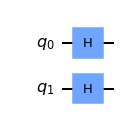

In [4]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw("mpl")

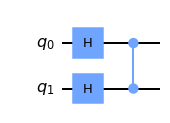

In [5]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw("mpl")

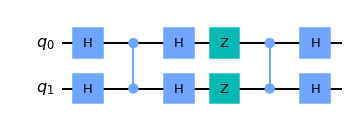

In [6]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw("mpl")

In [7]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

In [8]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

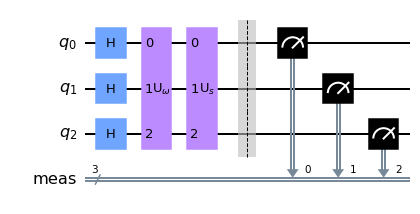

In [9]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw("mpl")

## Classical Solution

In [10]:
import math

def grover_search(strings, search_string):
    """
    This function takes a list of strings and a search string as input,
    and returns the index of the first occurrence of the search string in the list.
    """
    # Step 1: Calculate the number of qubits needed to represent the strings
    num_strings = len(strings)
    num_qubits = math.ceil(math.log2(num_strings))
    
    # Step 2: Initialize the quantum state with equal superposition of all states
    amplitudes = [1/math.sqrt(num_strings) for i in range(num_strings)]
    
    # Step 3: Apply the oracle that marks the states containing the search string
    for i in range(num_strings):
        if strings[i] == search_string:
            amplitudes[i] *= -1
    
    # Step 4: Apply the diffusion operator to amplify the amplitudes of marked states
    mean = sum(amplitudes) / num_strings
    amplitudes = [(2 * mean - a) for a in amplitudes]
    
    # Step 5: Measure the state and return the index of the state with highest probability
    max_prob = max(amplitudes)
    index = amplitudes.index(max_prob)
    
    return index

In [11]:
import pandas as pd
df = pd.read_csv('agri.csv') 
df.head(6)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000
5,Andaman and Nicobar,South Andaman,Port Blair,Bottle gourd,Other,04/03/2019,3000,4000,3500


In [12]:
df['commodity'][0]

'Amaranthus'

In [13]:
# Create an empty list to store the strings
strings = []

rows = df['commodity']
# Loop through each row and append the string to the list
for row in rows:
    strings.append(row)



In [14]:
strings

['Amaranthus',
 'Banana - Green',
 'Bhindi(Ladies Finger)',
 'Bitter gourd',
 'Black pepper',
 'Bottle gourd',
 'Brinjal',
 'Cabbage',
 'Carrot',
 'Cauliflower',
 'Cluster beans',
 'Coconut',
 'Colacasia',
 'Onion',
 'Potato',
 'Tomato',
 'Tomato',
 'Tomato',
 'Bengal Gram(Gram)(Whole)',
 'Jowar(Sorghum)',
 'Paddy(Dhan)(Common)',
 'Paddy(Dhan)(Common)',
 'Lentil (Masur)(Whole)',
 'Rice',
 'Rice',
 'Bitter gourd',
 'Bottle gourd',
 'Brinjal',
 'Cabbage',
 'Carrot',
 'Cauliflower',
 'Cluster beans',
 'Cucumbar(Kheera)',
 'Field Pea',
 'French Beans (Frasbean)',
 'Green Chilli',
 'Knool Khol',
 'Potato',
 'Pumpkin',
 'Raddish',
 'Tomato',
 'Black Gram (Urd Beans)(Whole)',
 'Green Gram (Moong)(Whole)',
 'Jute',
 'Maida Atta',
 'Mustard',
 'Rice',
 'Rice',
 'Wheat Atta',
 'Garlic',
 'Green Gram (Moong)(Whole)',
 'Masur Dal',
 'Onion',
 'Potato',
 'Rice',
 'Wheat Atta',
 'Bitter gourd',
 'Brinjal',
 'Cabbage',
 'Carrot',
 'Cauliflower',
 'Cucumbar(Kheera)',
 'Garlic',
 'Green Chilli',
 'Onio

In [15]:
search_string = 'Banana - Green'

result = grover_search(strings, search_string)
print(result)


1


## Quantum Solution 

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
import math

def grovers_algorithm(query, database):
    n = len(database[0])
    num_iterations = int(math.pi/4 * math.sqrt(len(database)))
    
    # Create quantum and classical registers
    qr = QuantumRegister(n, 'q')
    cr = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qr, cr)

    # Apply Hadamard gates to all qubits
    for i in range(n):
        qc.h(qr[i])

    # Oracle to mark the query string
    oracle = QuantumCircuit(qr)
    for i in range(len(database)):
        if database[i] == query:
            for j in range(n):
                oracle.x(qr[j])
            break
    qc.append(oracle.to_instruction(), qr)

    # Diffusion operator
    diffusion = QuantumCircuit(qr)
    for i in range(n):
        diffusion.h(qr[i])
    for i in range(n):
        diffusion.x(qr[i])
    diffusion.h(qr[n-1])
    diffusion.mct(qr[:-1], qr[n-1])
    diffusion.h(qr[n-1])
    for i in range(n):
        diffusion.x(qr[i])
    for i in range(n):
        diffusion.h(qr[i])
    qc.append(diffusion.to_instruction(), qr)

    # Measure the qubits
    for i in range(n):
        qc.measure(qr[i], cr[i])
    
    circuit=qc.draw('mpl')

    # Execute the circuit on a simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    for key, value in counts.items():
        if value == 1:
            return key,circuit


The query string cherry was found at index 3 in the database.


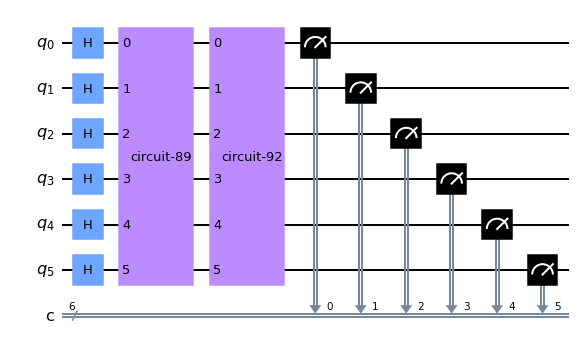

In [2]:
database = ['apples', 'banana', 'cherry', 'date', 'elderberry', 'fig']
query = 'cherry'

index,circuit = grovers_algorithm(query, database)

print(f"The query string '{query}' was found at index {int(index, 2)} in the database.")


circuit